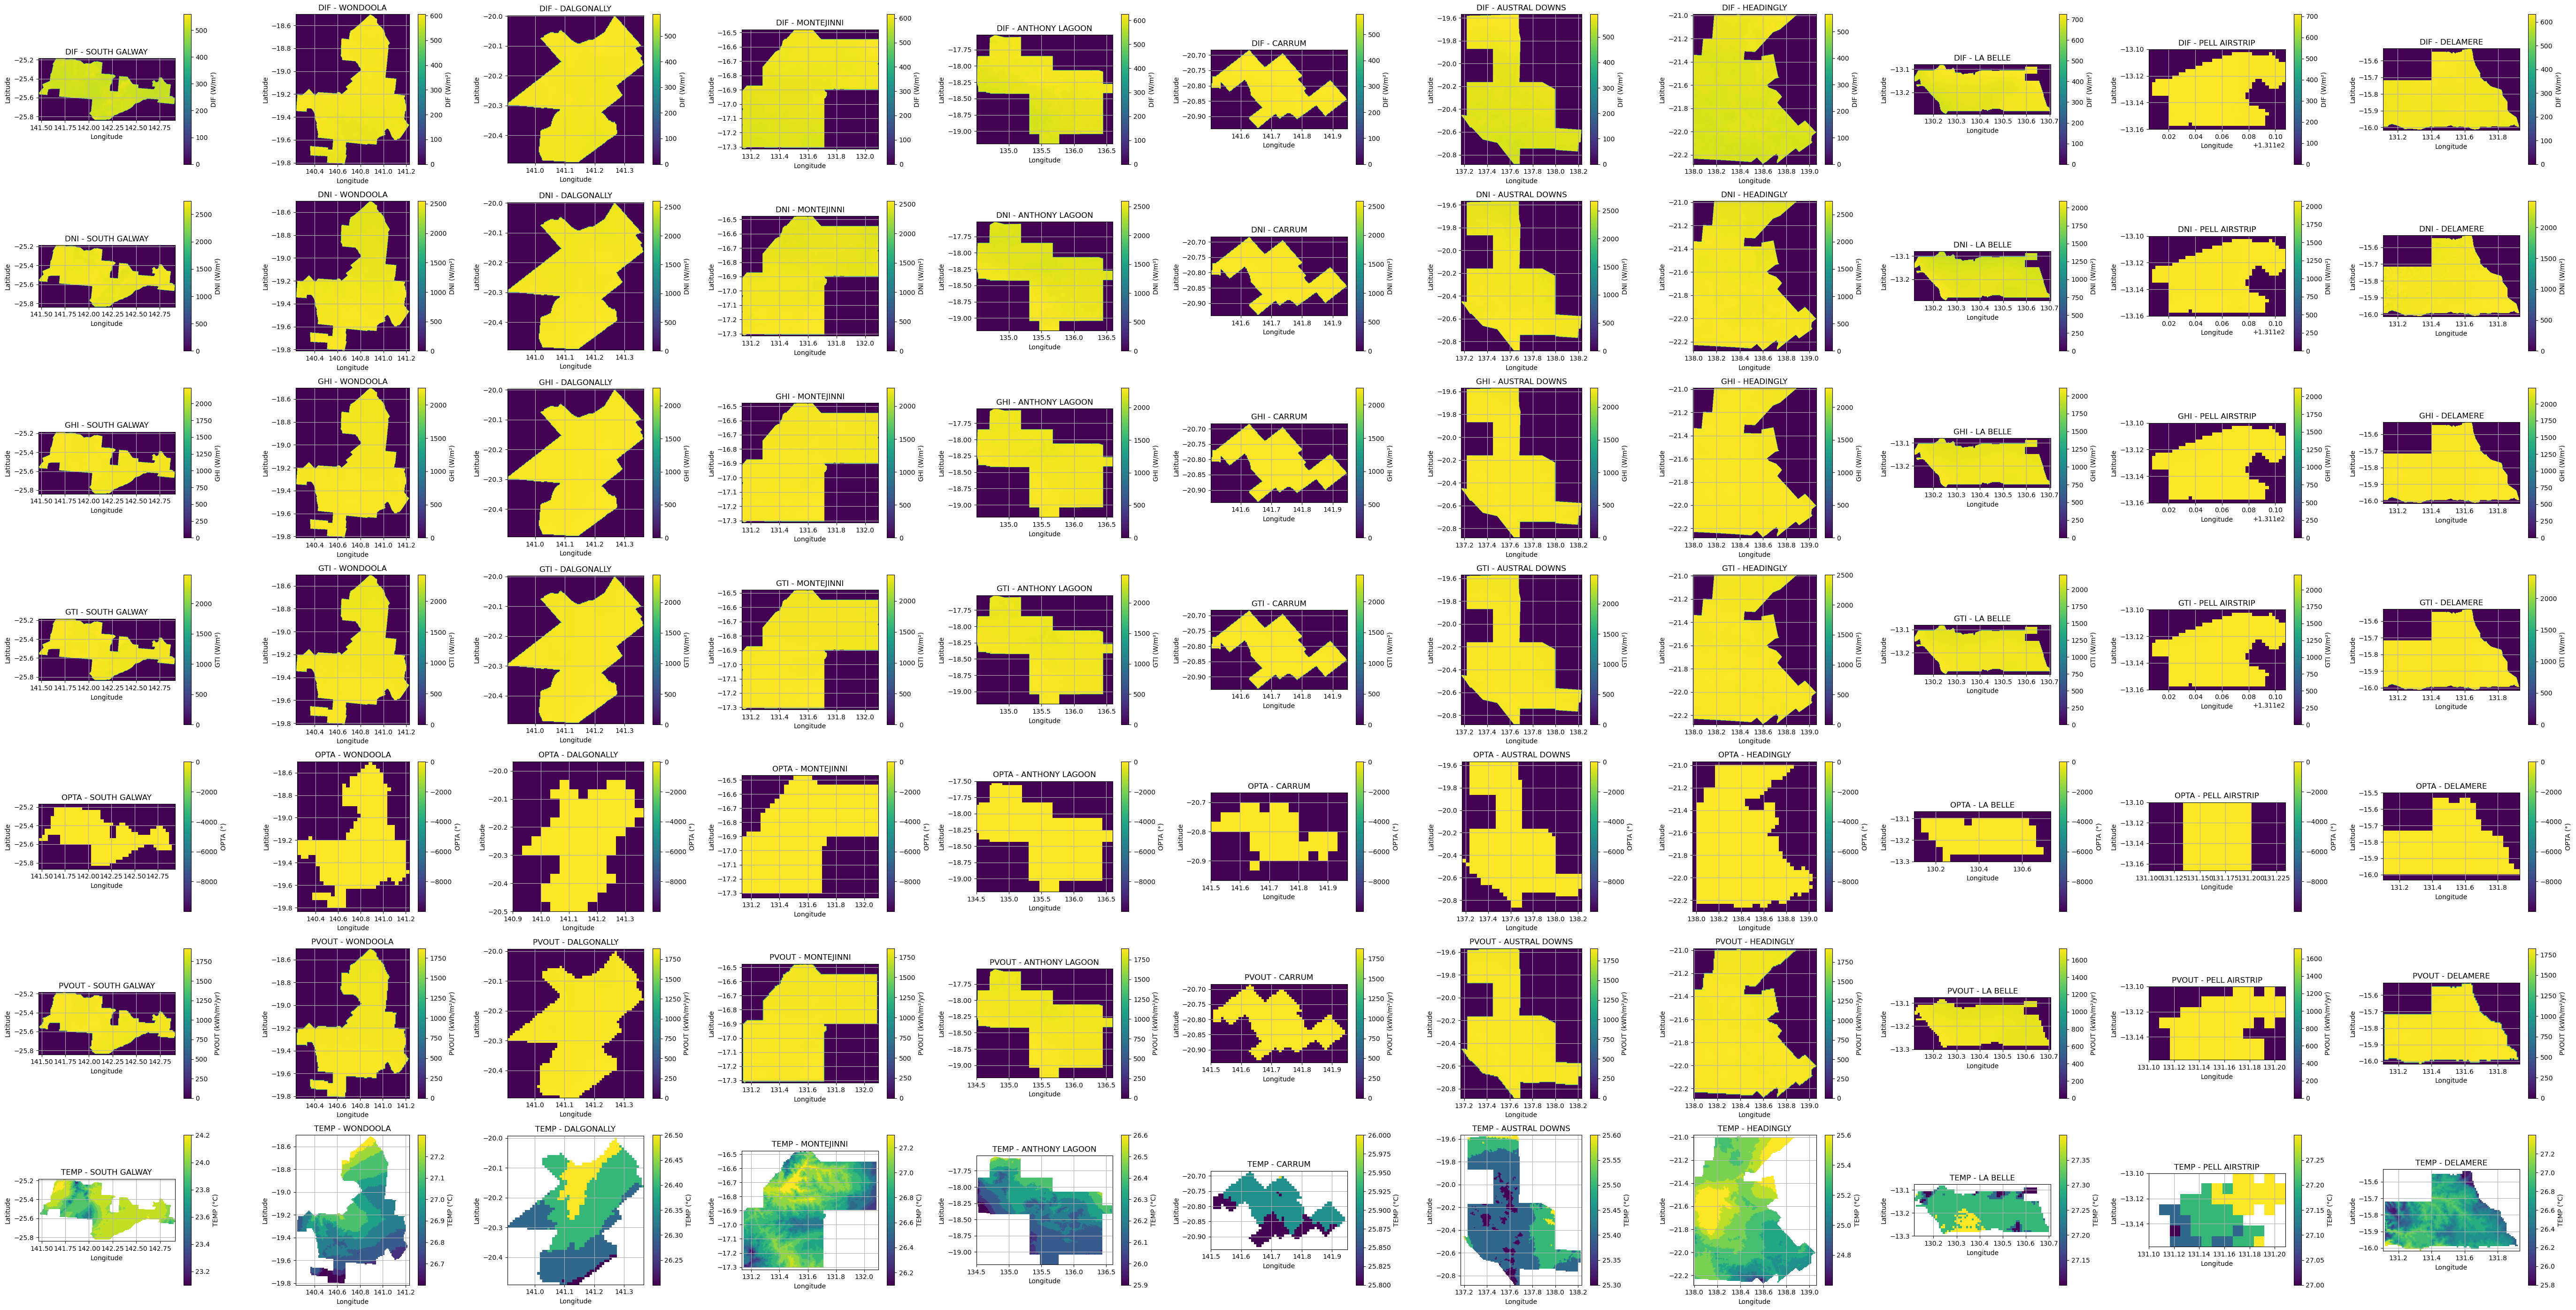

In [1]:
import geopandas as gpd
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt
import numpy as np
import os
from rasterio.plot import show
from shapely.geometry import mapping

# Paths
raster_folder_path = r"C:\Users\FIqbal\Downloads\Australia_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF\Australia_GISdata_LTAy_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF"
shapefile_path = r"C:\Users\FIqbal\Downloads\Data\Property_SHapefile.shp"

# List of rasters to process with corresponding units
raster_files = [
    ("DIF.tif", "W/m²"), 
    ("DNI.tif", "W/m²"), 
    ("GHI.tif", "W/m²"), 
    ("GTI.tif", "W/m²"), 
    ("OPTA.tif", "°"), 
    ("PVOUT.tif", "kWh/m²/yr"), 
    ("TEMP.tif", "°C")
]

# Load the shapefile using GeoPandas
shapefile = gpd.read_file(shapefile_path)

# Function to calculate statistics
def calculate_stats(clipped_raster):
    data = clipped_raster[0]  # Get the raster data array
    masked_data = np.ma.masked_array(data, np.isnan(data))  # Mask NaN values
    stats = {
        "min": np.min(masked_data),
        "max": np.max(masked_data),
        "mean": np.mean(masked_data),
        "std": np.std(masked_data)
    }
    return stats

# Set the number of rows and columns for the subplot grid
num_rows = len(raster_files)
num_cols = len(shapefile)

# Create a figure for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

# Loop through each polygon in the shapefile
for col_idx, (idx, polygon) in enumerate(enumerate(shapefile.iterrows())):
    geom = [mapping(polygon[1]['geometry'])]  # Get the geometry
    property_name = polygon[1]['property']  # Use 'property' for the property name

    # Loop through each raster and clip it using the polygon
    for row_idx, (raster_file, unit) in enumerate(raster_files):
        raster_path = os.path.join(raster_folder_path, raster_file)

        with rasterio.open(raster_path) as src:
            # Clip the raster with the polygon geometry
            out_image, out_transform = rasterio.mask.mask(src, geom, crop=True)
            out_meta = src.meta

            # Create a mask to exclude edge pixels
            mask = np.zeros(out_image.shape, dtype=bool)
            mask[0] = np.isin(out_image[0], out_image[0][~np.isnan(out_image[0])])  # Mask only valid pixels

            # Apply the mask
            out_image_masked = np.where(mask, out_image, np.nan)

            # Calculate statistics
            stats = calculate_stats(out_image_masked)

            # Plot the clipped raster using imshow with dynamic color range
            img = axes[row_idx, col_idx].imshow(out_image_masked[0], cmap='viridis', vmin=stats['min'], vmax=stats['max'], extent=(
                out_transform[2],  # left
                out_transform[2] + out_image.shape[2] * out_transform[0],  # right
                out_transform[5] + out_image.shape[1] * out_transform[4],  # bottom
                out_transform[5]  # top
            ))

            # Add a color bar with units
            cbar = fig.colorbar(img, ax=axes[row_idx, col_idx])
            cbar.set_label(f"{src.descriptions[0] if src.descriptions[0] else raster_file[:-4]} ({unit})")

            axes[row_idx, col_idx].set_title(f'{raster_file[:-4]} - {property_name}')
            axes[row_idx, col_idx].set_xlabel("Longitude")
            axes[row_idx, col_idx].set_ylabel("Latitude")
            axes[row_idx, col_idx].grid()

# Adjust layout
plt.tight_layout()
plt.show()


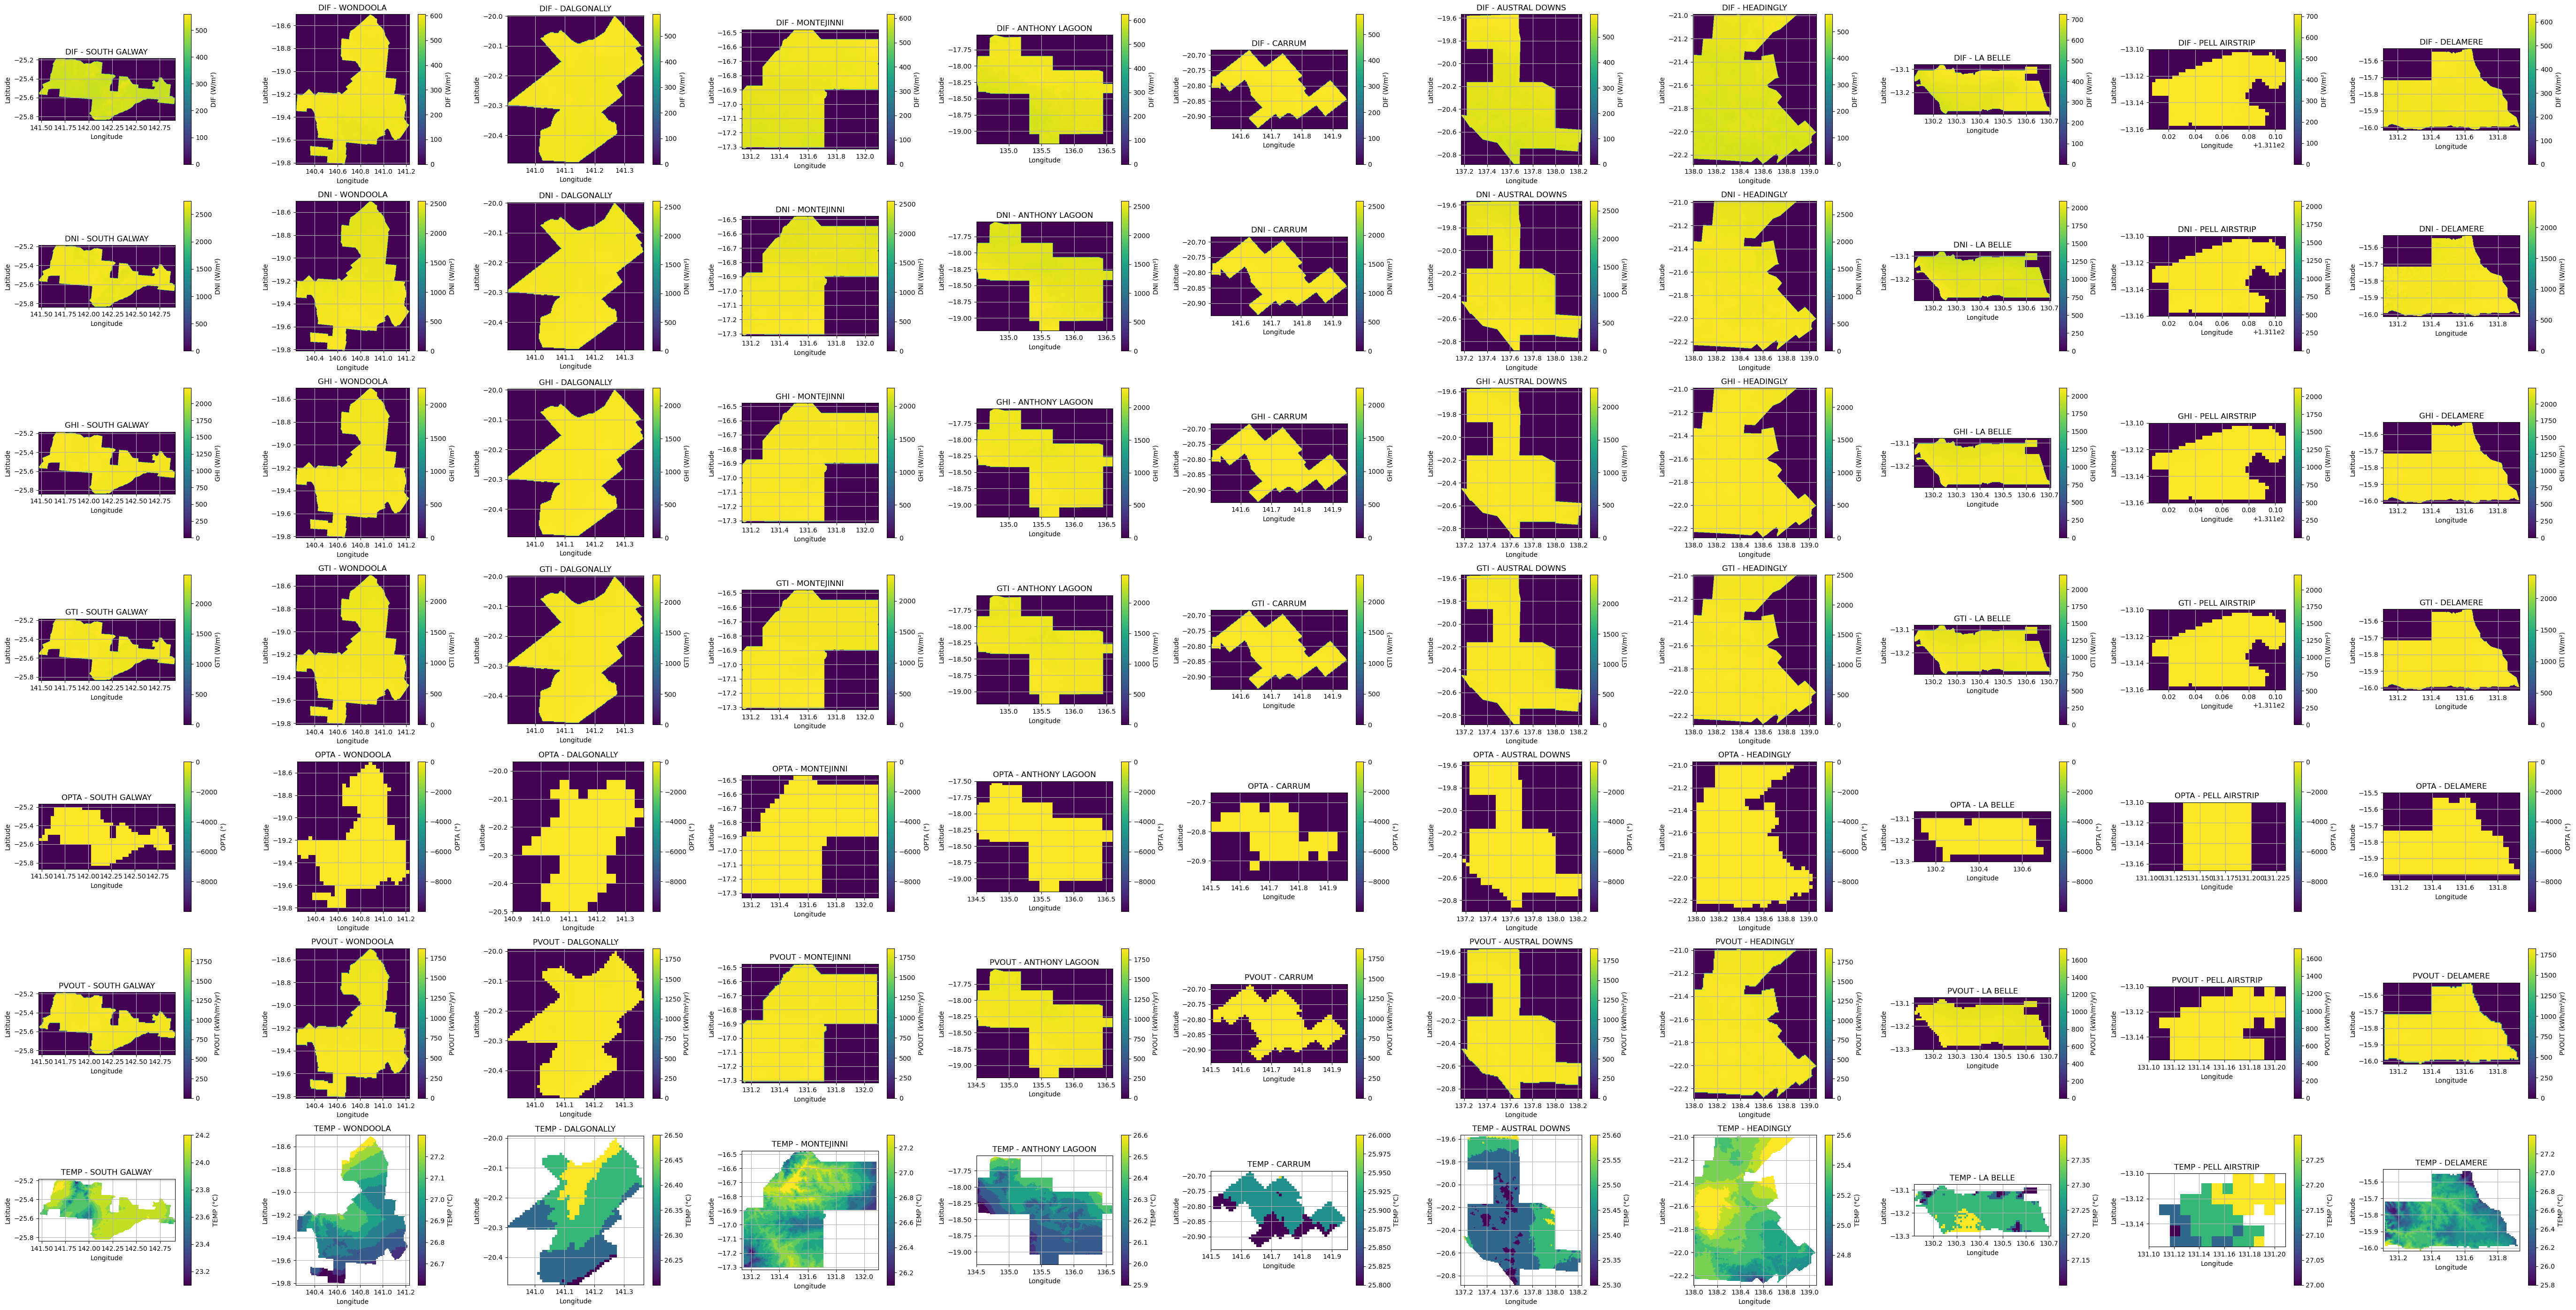

In [3]:
import geopandas as gpd
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import mapping

# Paths
raster_folder_path = r"C:\Users\FIqbal\Downloads\Australia_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF\Australia_GISdata_LTAy_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF"
shapefile_path = r"C:\Users\FIqbal\Downloads\Data\Property_SHapefile.shp"

# List of rasters to process with corresponding units
raster_files = [
    ("DIF.tif", "W/m²"), 
    ("DNI.tif", "W/m²"), 
    ("GHI.tif", "W/m²"), 
    ("GTI.tif", "W/m²"), 
    ("OPTA.tif", "°"), 
    ("PVOUT.tif", "kWh/m²/yr"), 
    ("TEMP.tif", "°C")
]

# Load the shapefile using GeoPandas
shapefile = gpd.read_file(shapefile_path)

# Function to calculate statistics
def calculate_stats(clipped_raster):
    data = clipped_raster[0]  # Get the raster data array
    masked_data = np.ma.masked_array(data, np.isnan(data))  # Mask NaN values
    stats = {
        "min": np.min(masked_data),
        "max": np.max(masked_data),
        "mean": np.mean(masked_data),
        "std": np.std(masked_data)
    }
    return stats

# Set the number of rows and columns for the subplot grid
num_rows = len(raster_files)
num_cols = len(shapefile)

# Create a figure for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

# Loop through each polygon in the shapefile
for col_idx, (idx, polygon) in enumerate(shapefile.iterrows()):
    geom = [mapping(polygon['geometry'])]  # Get the geometry
    property_name = polygon['property']  # Use 'property' for the property name

    # Loop through each raster and clip it using the polygon
    for row_idx, (raster_file, unit) in enumerate(raster_files):
        raster_path = os.path.join(raster_folder_path, raster_file)

        with rasterio.open(raster_path) as src:
            # Clip the raster with the polygon geometry
            out_image, out_transform = rasterio.mask.mask(src, geom, crop=True)
            out_meta = src.meta

            # Create a mask to exclude edge pixels
            masked_image = np.where(np.isnan(out_image), np.nan, out_image)

            # Calculate statistics
            stats = calculate_stats(masked_image)

            # Plot the clipped raster using imshow with dynamic color range
            img = axes[row_idx, col_idx].imshow(masked_image[0], cmap='viridis', vmin=stats['min'], vmax=stats['max'], extent=(
                out_transform[2],  # left
                out_transform[2] + out_image.shape[2] * out_transform[0],  # right
                out_transform[5] + out_image.shape[1] * out_transform[4],  # bottom
                out_transform[5]  # top
            ))

            # Set areas outside the polygon to white
            img.set_clim(vmin=stats['min'], vmax=stats['max'])
            masked_image[masked_image == np.nan] = 0  # Set outside to 0

            # Add a color bar with units
            cbar = fig.colorbar(img, ax=axes[row_idx, col_idx])
            cbar.set_label(f"{src.descriptions[0] if src.descriptions[0] else raster_file[:-4]} ({unit})")

            axes[row_idx, col_idx].set_title(f'{raster_file[:-4]} - {property_name}')
            axes[row_idx, col_idx].set_xlabel("Longitude")
            axes[row_idx, col_idx].set_ylabel("Latitude")
            axes[row_idx, col_idx].grid()

# Adjust layout
plt.tight_layout()
plt.show()


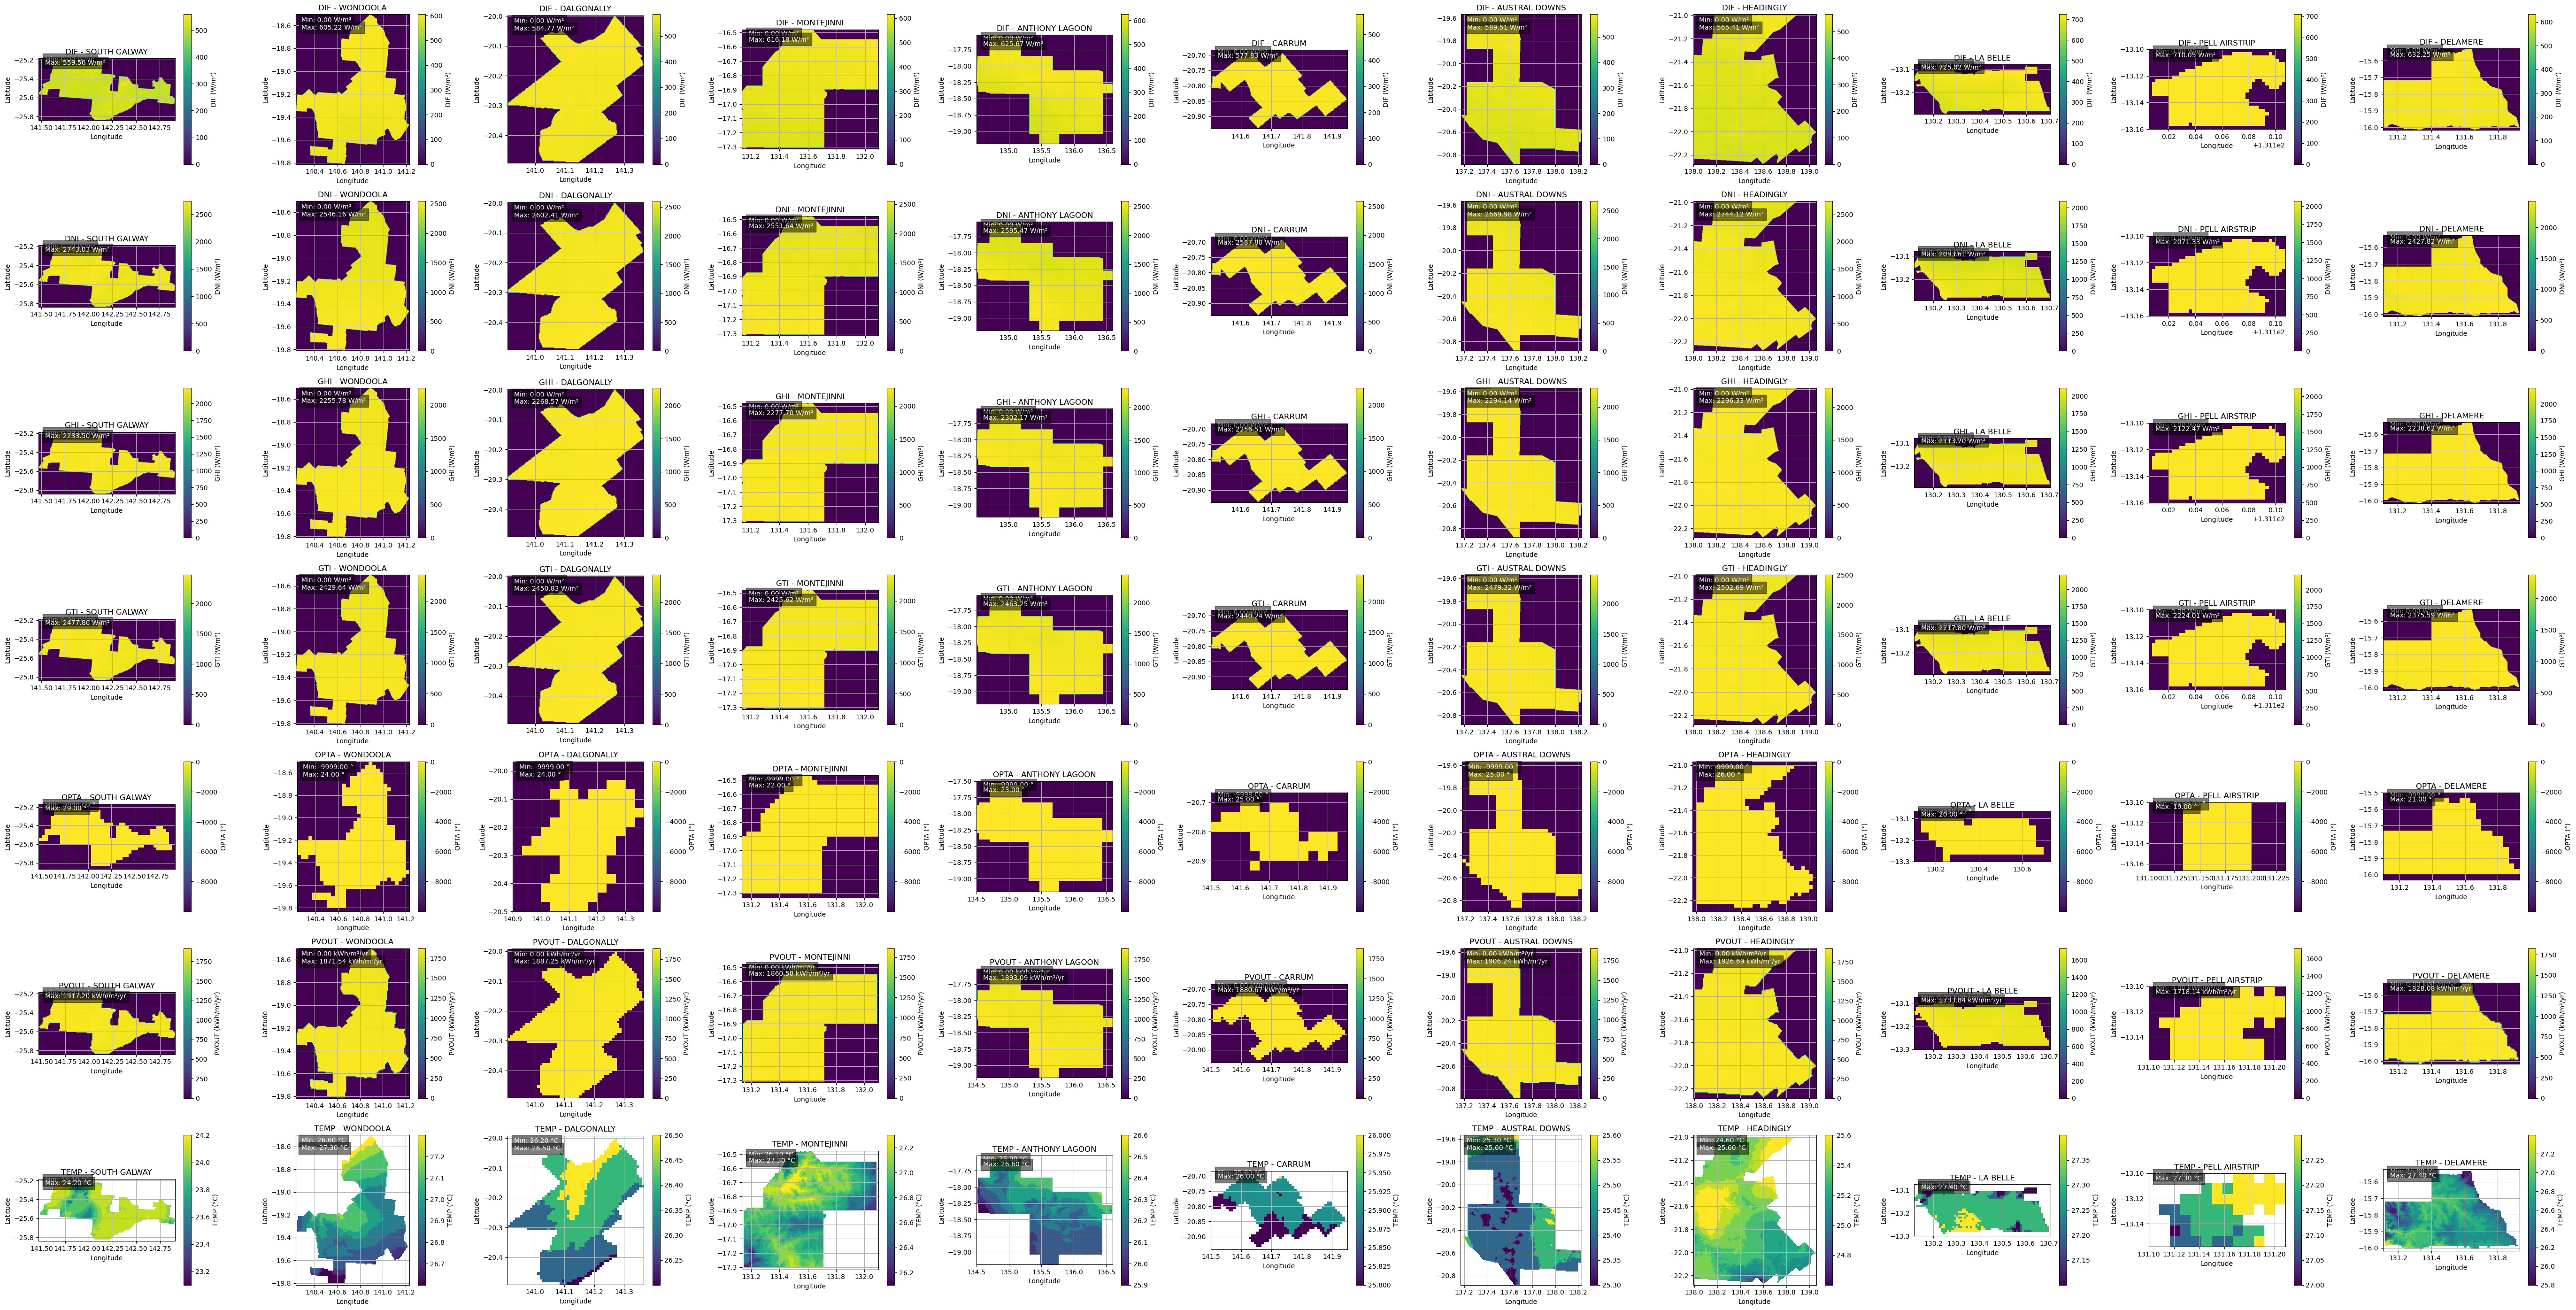

In [4]:
import geopandas as gpd
import rasterio
import rasterio.mask
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import mapping

# Paths
raster_folder_path = r"C:\Users\FIqbal\Downloads\Australia_GISdata_LTAym_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF\Australia_GISdata_LTAy_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF"
shapefile_path = r"C:\Users\FIqbal\Downloads\Data\Property_SHapefile.shp"

# List of rasters to process with corresponding units
raster_files = [
    ("DIF.tif", "W/m²"), 
    ("DNI.tif", "W/m²"), 
    ("GHI.tif", "W/m²"), 
    ("GTI.tif", "W/m²"), 
    ("OPTA.tif", "°"), 
    ("PVOUT.tif", "kWh/m²/yr"), 
    ("TEMP.tif", "°C")
]

# Load the shapefile using GeoPandas
shapefile = gpd.read_file(shapefile_path)

# Function to calculate statistics
def calculate_stats(clipped_raster):
    data = clipped_raster[0]  # Get the raster data array
    masked_data = np.ma.masked_array(data, np.isnan(data))  # Mask NaN values
    stats = {
        "min": np.min(masked_data),
        "max": np.max(masked_data),
        "mean": np.mean(masked_data),
        "std": np.std(masked_data)
    }
    return stats

# Set the number of rows and columns for the subplot grid
num_rows = len(raster_files)
num_cols = len(shapefile)

# Create a figure for the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))

# Loop through each polygon in the shapefile
for col_idx, (idx, polygon) in enumerate(shapefile.iterrows()):
    geom = [mapping(polygon['geometry'])]  # Get the geometry
    property_name = polygon['property']  # Use 'property' for the property name

    # Loop through each raster and clip it using the polygon
    for row_idx, (raster_file, unit) in enumerate(raster_files):
        raster_path = os.path.join(raster_folder_path, raster_file)

        with rasterio.open(raster_path) as src:
            # Clip the raster with the polygon geometry
            out_image, out_transform = rasterio.mask.mask(src, geom, crop=True)
            out_meta = src.meta

            # Create a mask to exclude edge pixels
            masked_image = np.where(np.isnan(out_image), np.nan, out_image)

            # Calculate statistics
            stats = calculate_stats(masked_image)

            # Plot the clipped raster using imshow with dynamic color range
            img = axes[row_idx, col_idx].imshow(masked_image[0], cmap='viridis', vmin=stats['min'], vmax=stats['max'], extent=(
                out_transform[2],  # left
                out_transform[2] + out_image.shape[2] * out_transform[0],  # right
                out_transform[5] + out_image.shape[1] * out_transform[4],  # bottom
                out_transform[5]  # top
            ))

            # Set areas outside the polygon to white
            masked_image[masked_image == np.nan] = 0  # Set outside to 0

            # Add a color bar with units
            cbar = fig.colorbar(img, ax=axes[row_idx, col_idx])
            cbar.set_label(f"{src.descriptions[0] if src.descriptions[0] else raster_file[:-4]} ({unit})")

            # Add titles and labels
            axes[row_idx, col_idx].set_title(f'{raster_file[:-4]} - {property_name}')
            axes[row_idx, col_idx].set_xlabel("Longitude")
            axes[row_idx, col_idx].set_ylabel("Latitude")
            axes[row_idx, col_idx].grid()

            # Annotate min and max values
            axes[row_idx, col_idx].annotate(f'Min: {stats["min"]:.2f} {unit}', xy=(0.05, 0.95), 
                                             xycoords='axes fraction', fontsize=10, color='white', 
                                             bbox=dict(facecolor='black', alpha=0.5))
            axes[row_idx, col_idx].annotate(f'Max: {stats["max"]:.2f} {unit}', xy=(0.05, 0.90), 
                                             xycoords='axes fraction', fontsize=10, color='white', 
                                             bbox=dict(facecolor='black', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.show()
